<a href="https://colab.research.google.com/github/pilgujeong10/TEST/blob/master/DEEP_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install opencv-python

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth=GoogleAuth()
gauth.credentials= GoogleCredentials.get_application_default()
drive=GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 20.0MB/s 


In [0]:
# 실질적으로 구글드라이브에서 파일을 불러오는 방법입니다.
# 위에서 준비해두었던 공유 가능한 링크에서 'id=' 이후에 있는 문자열을 복사하여 file_id로 사용합니다.
file_id = '1rya9tkCuzm3F33L9ilT3RtLVUaDQsuOW'
# file_id로부터 파일 객체를 생성합니다.
downloaded = drive.CreateFile({'id': file_id})
# 불러온 파일 객체를 Colab에 저장합니다.
downloaded.GetContentFile('training.zip')

# 압축해제
!unzip training.zip
# 파일 확인
!ls ./testing/image
# 파일 확인
!ls ./testing/label

Archive:  training.zip
   creating: testing/
   creating: testing/image/
  inflating: testing/image/ISIC_0000000.jpg  
  inflating: testing/image/ISIC_0000001.jpg  
  inflating: testing/image/ISIC_0000003.jpg  
  inflating: testing/image/ISIC_0000004.jpg  
  inflating: testing/image/ISIC_0000006.jpg  
  inflating: testing/image/ISIC_0000007.jpg  
  inflating: testing/image/ISIC_0000008.jpg  
  inflating: testing/image/ISIC_0000009.jpg  
  inflating: testing/image/ISIC_0000011.jpg  
  inflating: testing/image/ISIC_0000012.jpg  
  inflating: testing/image/ISIC_0000013.jpg  
  inflating: testing/image/ISIC_0000014.jpg  
  inflating: testing/image/ISIC_0000015.jpg  
  inflating: testing/image/ISIC_0000016.jpg  
  inflating: testing/image/ISIC_0000017.jpg  
  inflating: testing/image/ISIC_0000018.jpg  
  inflating: testing/image/ISIC_0000019.jpg  
  inflating: testing/image/ISIC_0000020.jpg  
  inflating: testing/image/ISIC_0000021.jpg  
  inflating: testing/image/ISIC_0000022.jpg  
  infla

./training/image/ISIC_0010587.jpg
ISIC_0010587


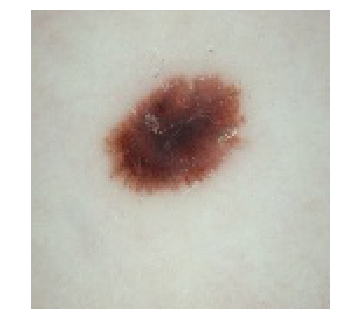

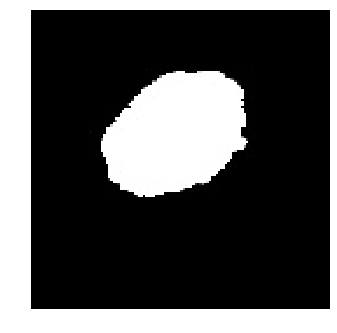

In [0]:
import os
import numpy as np
import glob
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


imgDir = './training/image/'
labelDir = './training/label/'

# 트레이닝 영상 리스트 얻기
imgList = glob.glob(imgDir + "/*.jpg")

for f in imgList:
  print(f)
  # 트레이닝 영상으로부터 id 얻기
  id = os.path.basename(f)
  id = os.path.splitext(id)[0]
  print(id)
  
  # label 영상 경로 
  labelF = labelDir + "/" + id + "_segmentation.jpg"  
  
  # 영상 로드
  img = mpimg.imread(f)
  plt.imshow(img)
  plt.axis("off")
  plt.show()
  
  label = mpimg.imread(labelF)
  plt.imshow(label)
  plt.axis("off")
  plt.show()
  
  break

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_41 (Conv2D)              (None, 128, 128, 16) 448         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, 128, 128, 16) 2320        conv2d_41[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_9 (MaxPooling2D)  (None, 64, 64, 16)   0           conv2d_42[0][0]                  
__________________________________________________________________________________________________
conv2d_43 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_dat

27/26 [==============================] - 15s 560ms/step - loss: 0.5568 - bce_loss: 0.5568 - val_loss: 0.4679 - val_bce_loss: 0.4679

Epoch 00001: val_loss improved from inf to 0.46787, saving model to ./checkpoint/unet.hdf5
Epoch 2/20
27/26 [==============================] - 7s 256ms/step - loss: 0.4010 - bce_loss: 0.4010 - val_loss: 0.3392 - val_bce_loss: 0.3392

Epoch 00002: val_loss improved from 0.46787 to 0.33925, saving model to ./checkpoint/unet.hdf5
Epoch 3/20
27/26 [==============================] - 11s 410ms/step - loss: 0.3434 - bce_loss: 0.3434 - val_loss: 0.2935 - val_bce_loss: 0.2935

Epoch 00003: val_loss improved from 0.33925 to 0.29355, saving model to ./checkpoint/unet.hdf5
Epoch 4/20
27/26 [==============================] - 11s 399ms/step - loss: 0.2994 - bce_loss: 0.2994 - val_loss: 0.2802 - val_bce_loss: 0.2802

Epoch 00004: val_loss improved from 0.29355 to 0.28021, saving model to ./checkpoint/unet.hdf5
Epoch 5/20
27/26 [==============================] - 11s 392m

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1/1 [==============================] - 1s 1s/step
1.0
5.981326e-05
255.0
0.0


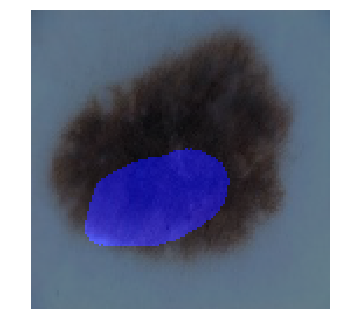

1.0
1.6987324e-06
255.0
0.0


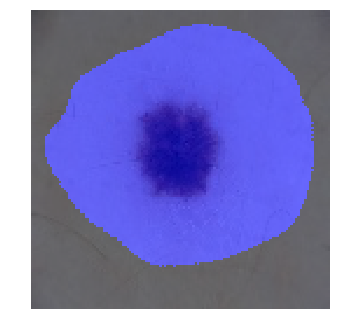

0.99989367
0.0
255.0
0.0


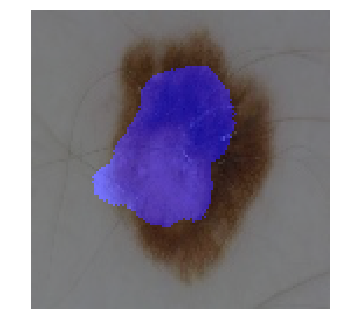

0.99999595
0.0011876523
255.0
0.0


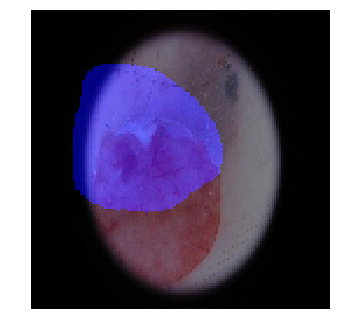

1.0
3.8444996e-06
255.0
0.0


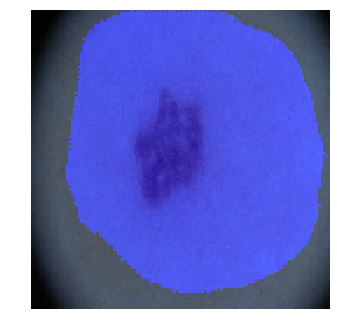

0.99999964
0.0011499822
255.0
0.0


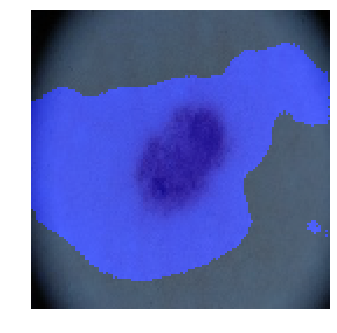

0.9999994
2.3812056e-05
255.0
0.0


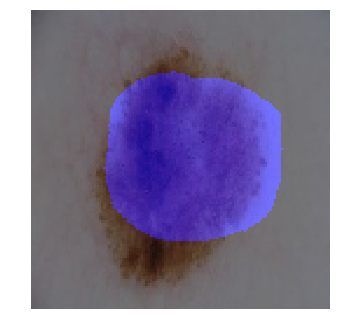

0.9433502
0.0
255.0
0.0


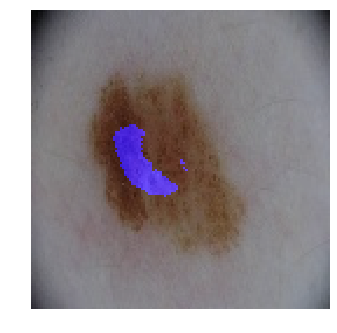

0.9999998
3.322959e-05
255.0
0.0


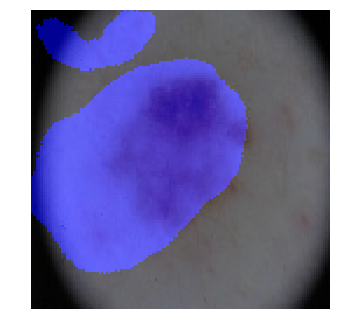

0.99974775
0.000664413
255.0
0.0


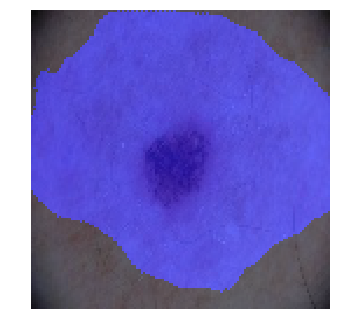

Dice Coefficient
0.45903406546145076


In [0]:
from keras.callbacks import ModelCheckpoint

from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.activations import *
from keras.preprocessing.image import ImageDataGenerator
from keras.losses import *

import os
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2

def bce_loss(y_true, y_pred):
    ''' Binary Cross Entropy

    Args:
        y_true (np.array): prediction
        y_pred (np.array): ground-truth
    '''
    return binary_crossentropy(y_true, y_pred)
  
def CNNArch(input_size, lr, depth=1):
    inputs = Input(input_size)

    outLayer = []
    # Encoder
    out = inputs
    base = 16
    for d in range(depth):
      numFeatures = base * (d + 1)
      out = Conv2D(numFeatures, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal')(out)
      out = Conv2D(numFeatures, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal')(out)
      outLayer.append(out)
      out = MaxPooling2D(pool_size=(2, 2))(out)
      
    # bottom layer
    numFeatures = base * (depth + 1)
    out = Conv2D(numFeatures, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal')(out)
    out = Conv2D(numFeatures, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal')(out)
    
    # Decoder
    for d in range(depth):
        numFeatures = base * (depth - d)
        # Deconvolution (transposed convolution)
        out = Conv2DTranspose(numFeatures, (2, 2), strides=(2, 2), padding='same', kernel_initializer = 'he_normal')(out)
        prev = outLayer[depth-(d+1)]
        out = concatenate([out, prev], axis=-1)
        # Convolution
        out = Conv2D(numFeatures, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal')(out)
        out = Conv2D(numFeatures, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal')(out)
    
    out = Conv2D(base, (3, 3), activation='relu', padding='same', kernel_initializer = 'he_normal')(out)
    out = Conv2D(1, (1, 1), activation='sigmoid')(out)
    
    # Model 구축
    model = Model(inputs=[inputs], outputs=[out])
    model.compile(optimizer=Adam(lr=lr), loss=bce_loss, metrics=[bce_loss])
    model.summary()
    
    return model

# Label to binary
def adjust_data(image, label):
    image = image[0] / 255.0
    image = image[...,::-1]
    # label map 설정 (JPEG 포맷으로 binary mask이지만 정확한 1값이 아닐 수 있음)
    label = label[0][:,:,:,0]
#     print(np.max(label))
    label = np.expand_dims(label, axis=-1)
    label[label < 25] = 0
    label[label >= 25] = 1
    
    
    return image, label
  
# Keras Dataset 함수
def dataset(data_root, mask_root, target_size, batch_size):
    image_datagen = ImageDataGenerator(featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
    
    label_datagen = ImageDataGenerator(featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

    # Dataloader (image)
    image_generator = image_datagen.flow_from_directory(
        data_root,
        classes=['image'],
        target_size = target_size,
        batch_size=batch_size,
        seed=1)

    # Dataloader (label)
    label_generator = label_datagen.flow_from_directory(
        mask_root,
        classes=['label'],
        target_size = target_size,
        batch_size=batch_size,
        seed=1)

    data_generator = zip(image_generator, label_generator)
    for i, (image, label) in enumerate(data_generator):
        image, label = adjust_data(image, label)
        yield (image, label)
        
        
def save_result(output, data_root, predict_root, gt_root=None):
    img_path = []
    img_path += glob.glob(os.path.join(data_root, 'image/*.jpg'))
    img_path = sorted(img_path)

    label_path = []
    label_path += glob.glob(os.path.join(data_root, 'label/*.jpg'))
    label_path = sorted(label_path)

    output = output.squeeze()
    count = 0
    avgDice = 0
    for i in range(output.shape[0]):
        filename = img_path[i].split('/')[-1]
        predict_path = os.path.join(predict_root, filename)
        gt_path = os.path.join(gt_root, filename)

        img = mpimg.imread(img_path[i])
        label = mpimg.imread(label_path[i])
        target = cv2.imread(label_path[i])

        print(np.max(output[i]))
        print(np.min(output[i]))
        pred = np.round(output[i]) * 255.0 
        print(np.max(pred))
        print(np.min(pred))
        pred = np.expand_dims(pred, axis=2)
        zeros = np.zeros(pred.shape)
        pred = np.concatenate((zeros,zeros,pred), axis=2)
        
        pred = img + pred
        pred = (pred/(pred.max()+1e-6))*255.0
        pred = pred.astype(np.int)
        plt.imshow(pred)
        plt.axis("off")
        plt.show()
        count += 1
        
        #label adjust
        target = target[:,:,0]
        target[target < 25] = 0
        target[target >= 25] = 1
    
        intersect = np.round(output[i])
        intersect = np.count_nonzero(intersect[target==1])
        
        pred = output[i]
        entire = np.count_nonzero(pred[pred == 1]) + np.count_nonzero(label[target==1])        
        
        dice = intersect*2/entire
        avgDice = avgDice + dice
        
        if count == 10:
          print("Dice Coefficient")
          print(avgDice/count)
          break
          
        
# Main 함수
if __name__ == "__main__":
  # 폴더 설정
  imgDir = './training/'
  labelDir = './training/'
  testImgDir = './testing/'
  testLabelDir = './testing/'
  outDir = './output/'
  
  # 모델 저장 위치
  if (not os.path.exists('./checkpoint')):
    os.mkdir('./checkpoint')
  train_ckpt_path = './checkpoint/unet.hdf5'
  test_ckpt_path = './checkpoint/trained/unet.hdf5'

  if (not os.path.exists(outDir)):
    os.mkdir(outDir)
  # 파라미터 설정
  input_size = (128,128,3)
  
  # Hyperparameters
  epoch = 20
  lr = 0.001
  train_batch_size = 30
  test_batch_size = 30
  depth = 3
  
  # 트레이닝 데이터 셋 설정
  trainingSet = dataset(imgDir, labelDir, (128,128), train_batch_size)
  # 테스트 데이터 셋 설정
  testingSet = dataset(testImgDir, testLabelDir, (128,128),test_batch_size)
  
  # Model 구축
  model = CNNArch(input_size, lr, depth)
  
  # Checkpoint 셋팅
  model_checkpoint = ModelCheckpoint(train_ckpt_path,
                                    monitor='val_loss',
                                    verbose=2,
                                    save_best_only=True)
  # Model Train
  model.fit_generator(trainingSet,
                    steps_per_epoch=800/train_batch_size,
                    shuffle=True,
                    epochs=epoch,
                    validation_data=testingSet,
                    validation_steps=200/test_batch_size,
                    use_multiprocessing=True,
                    callbacks=[model_checkpoint],
                    workers=1)
  
  # Model Test
  results = model.predict_generator(testingSet,
                                    steps=1,
                                    verbose=1)
  save_result(results, testImgDir, outDir, testImgDir)

